Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

In [5]:
import pandas as pd

In [6]:
refined_software_packages = pd.read_csv("../data/refined_software_packages_rest.csv")

In [7]:
refined_software_rc = wosis.extract_recs(refined_software_packages.loc[:, 'id'], RC, name='Refined Software Packages')

In [8]:
software_packages = pd.read_csv("../data/software_packages_rest.csv")

In [9]:
software_rc = wosis.extract_recs(software_packages.loc[:, 'id'], RC, name='Software Packages')

In [10]:
deleted_papers_rc = software_rc - refined_software_rc

Various analyses of the software data

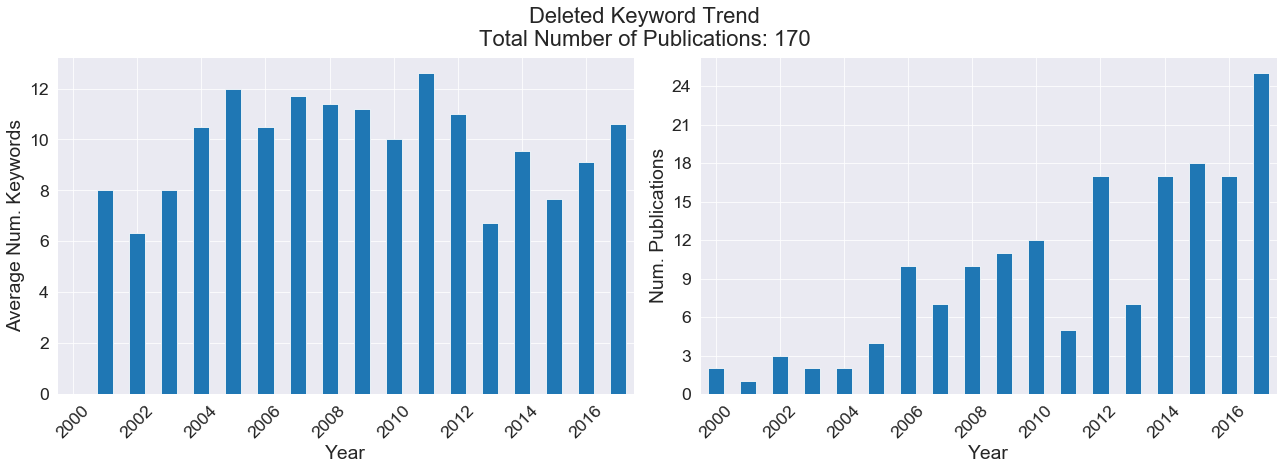

In [11]:
wos_plot.plot_kw_trend(deleted_papers_rc, title='Deleted Keyword Trend', save_plot_fn='figs/deleted_kw_trend.png')

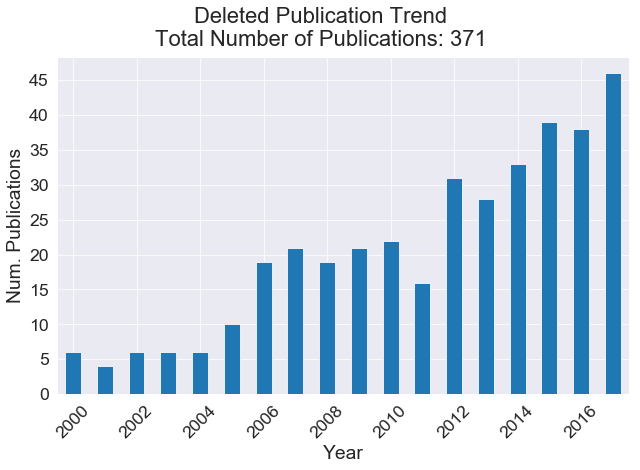

In [12]:
wos_plot.plot_pub_trend(software_rc, title='Deleted Publication Trend', save_plot_fn='figs/deleted_pub_trend.png')

In [13]:
oat = wosis.keyword_matches(software_rc, ['local sensitivity', 'oat', 'one-at-a-time', 'perturb'], threshold=95.0)

In [14]:
all_oat = oat.combine_recs()

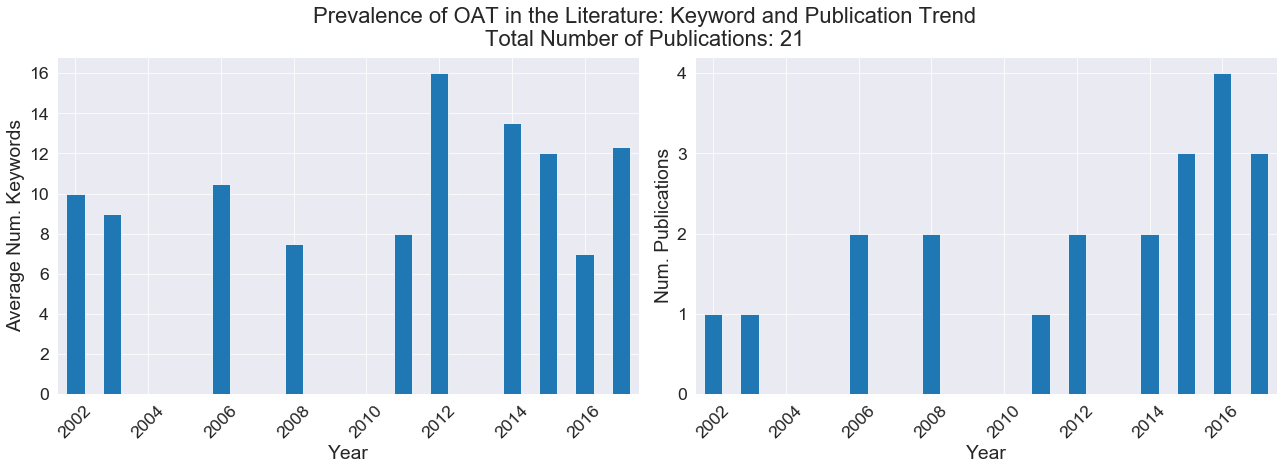

In [15]:
wos_plot.plot_kw_trend(all_oat, title='Prevalence of OAT in the Literature: Keyword and Publication Trend', save_plot_fn='figs/oat_pub_trend.png')

<hr> Top-cited journals from deleted papers

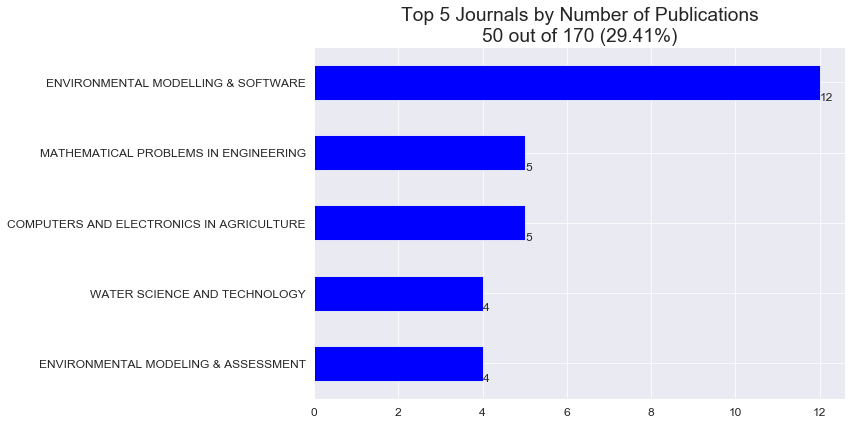

In [16]:
wos_plot.plot_pubs_per_journal(deleted_papers_rc, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/deleted_journal_pubs.png')

In [17]:
journals_of_interest_del = ['Environmental Modelling & Software'.upper(), 'Mathematical Problems in Engineering'.upper(), 'Computers and Electronics in Agriculture'.upper(), 'Water Science and Technology'.upper(), 'Environmental Modeling and Assessment'.upper()]
pubs_for_journals_del = wosis.find_pubs_by_journal(deleted_papers_rc, journals_of_interest_del)

In [18]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_del = {}
for pubs in pubs_for_journals_del:
    paper_citations_per_journal_del[pubs] = wosis.get_num_citations(pubs_for_journals_del[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 7FjTKc99WxyeqbbJ9by)



Authenticated (SID: 7ACRxvSULxZ9PGljx7T)



Authenticated (SID: 6DDztBGvhcuODtFKE8o)



Authenticated (SID: 6D6zSpGGgN6FPMzGTT3)


In [19]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_del = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_del.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_del = collection_del.append(df[cols_of_interest][0:10], ignore_index=True)

In [20]:
top_cited_in_top_journals_del = collection_del.sort_values('citations', ascending=False)
top_cited_in_top_journals_del.head(10)

,AU,year,title,journal,citations,DOI link
0,"Landuyt, D|Broekx, S|D'hondt, R|Engelen, G|Aer...",2013,A review of Bayesian belief networks in ecosys...,ENVIRONMENTAL MODELLING & SOFTWARE,94,https://dx.doi.org/10.1016/j.envsoft.2013.03.011
1,"van Delden, H|Seppelt, R|White, R|Jakeman, AJ",2011,A methodology for the design and development o...,ENVIRONMENTAL MODELLING & SOFTWARE,86,https://dx.doi.org/10.1016/j.envsoft.2010.03.021
2,"Chen, KP|Blong, R|Jacobson, C",2001,MCE-RISK: integrating multicriteria evaluation...,ENVIRONMENTAL MODELLING & SOFTWARE,79,https://dx.doi.org/10.1016/S1364-8152(01)00006-8
20,"Bertrand-Krajewski, JL",2007,Stormwater pollutant loads modelling: epistemo...,WATER SCIENCE AND TECHNOLOGY,58,https://dx.doi.org/10.2166/wst.2007.090
3,"Carnevale, C|Finzi, G|Pisoni, E|Volta, M|Guari...",2012,An integrated assessment tool to define effect...,ENVIRONMENTAL MODELLING & SOFTWARE,45,https://dx.doi.org/10.1016/j.envsoft.2012.07.004
4,"Brown, HE|Huth, NI|Holzworth, DP|Teixeira, EI|...",2014,Plant Modelling Framework: Software for buildi...,ENVIRONMENTAL MODELLING & SOFTWARE,28,https://dx.doi.org/10.1016/j.envsoft.2014.09.005
5,"Burger, G|Sitzenfrei, R|Kleidorfer, M|Rauch, W",2014,Parallel flow routing in SWMM 5,ENVIRONMENTAL MODELLING & SOFTWARE,27,https://dx.doi.org/10.1016/j.envsoft.2013.11.002
15,"Zobel, RW",2008,Hardware and software efficacy in assessment o...,COMPUTERS AND ELECTRONICS IN AGRICULTURE,21,https://dx.doi.org/10.1016/j.compag.2007.08.002
21,"Mair, M|Sitzenfrei, R|Kleidorfer, M|Moderl, M|...",2012,GIS-based applications of sensitivity analysis...,WATER SCIENCE AND TECHNOLOGY,18,https://dx.doi.org/10.2166/wst.2012.954
16,"Resop, JP|Fleisher, DH|Wang, QG|Timlin, DJ|Red...",2012,Combining explanatory crop models with geospat...,COMPUTERS AND ELECTRONICS IN AGRICULTURE,15,https://dx.doi.org/10.1016/j.compag.2012.08.001


In [21]:
top_cited_in_top_journals_del.to_csv('../data/top_cited_del_papers.csv')

<hr> Topic trend

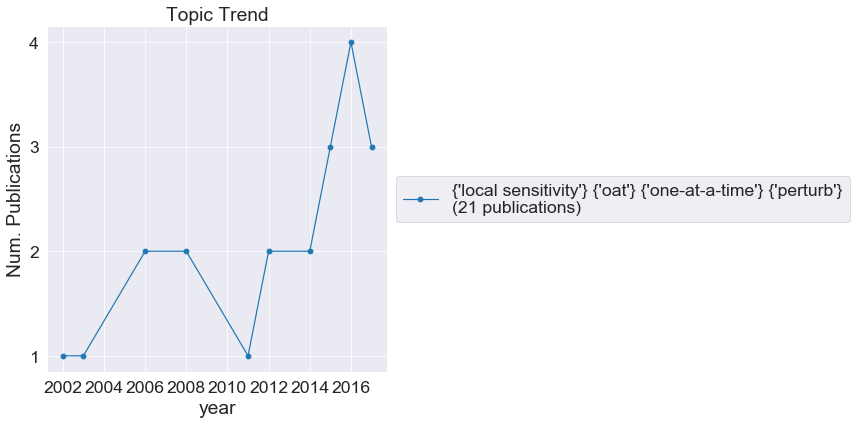

In [42]:
wos_plot.plot_topic_trend([all_oat], save_plot_fn='figs/oat_topic_trend.png')

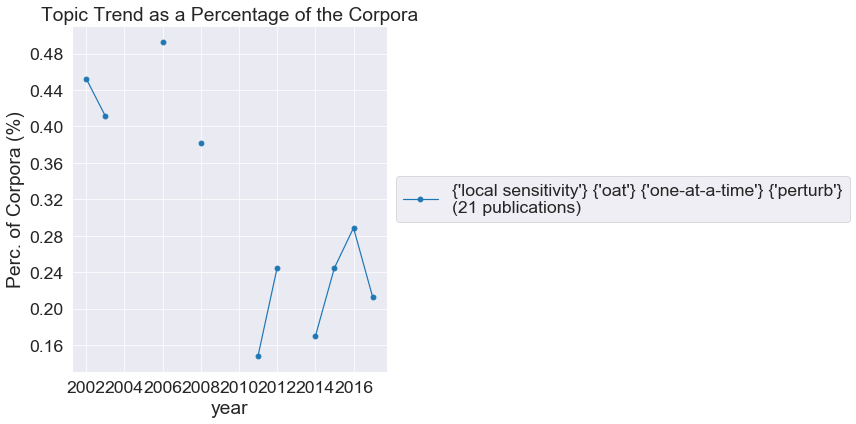

In [43]:
wos_plot.plot_topic_trend([all_oat], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/oat_topic_trend_percentage.png')